<a href="https://colab.research.google.com/github/Rehima1/Movie-Genre-Classification/blob/main/movie_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df_train = pd.read_csv('train_data.txt', delimiter=' ::: ', header=None, names=['TITLE', 'GENRE', 'DESCRIPTION'])


<ipython-input-3-30b35c83f4bc>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_train = pd.read_csv('train_data.txt', delimiter=' ::: ', header=None, names=['TITLE', 'GENRE', 'DESCRIPTION'])


In [4]:
df_test = pd.read_csv('test_data.txt', delimiter=' ::: ', header=None, names=['TITLE', 'DESCRIPTION'])


<ipython-input-4-c5b7c5a0f702>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_test = pd.read_csv('test_data.txt', delimiter=' ::: ', header=None, names=['TITLE', 'DESCRIPTION'])


In [5]:
df_train.head()


,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [6]:
df_test.head()


,TITLE,DESCRIPTION
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
5,Er nu zhai (1955),Before he was known internationally as a marti...


**Data Cleaning and Preprocessing**

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54214 non-null  object
 1   GENRE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [8]:
df_train.isnull().sum()


TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [9]:
print("TRAINING DUPLICATES:", df_train.duplicated().sum())


TRAINING DUPLICATES: 0


In [10]:
print("TEST DUPLICATES:", df_test.duplicated().sum())


TEST DUPLICATES: 0


In [12]:
print("TRAINING DUPLICATES AFTER REMOVAL:", df_train.duplicated().sum())

print("TEST DUPLICATES AFTER REMOVAL:", df_test.duplicated().sum())

TRAINING DUPLICATES AFTER REMOVAL: 0
TEST DUPLICATES AFTER REMOVAL: 0


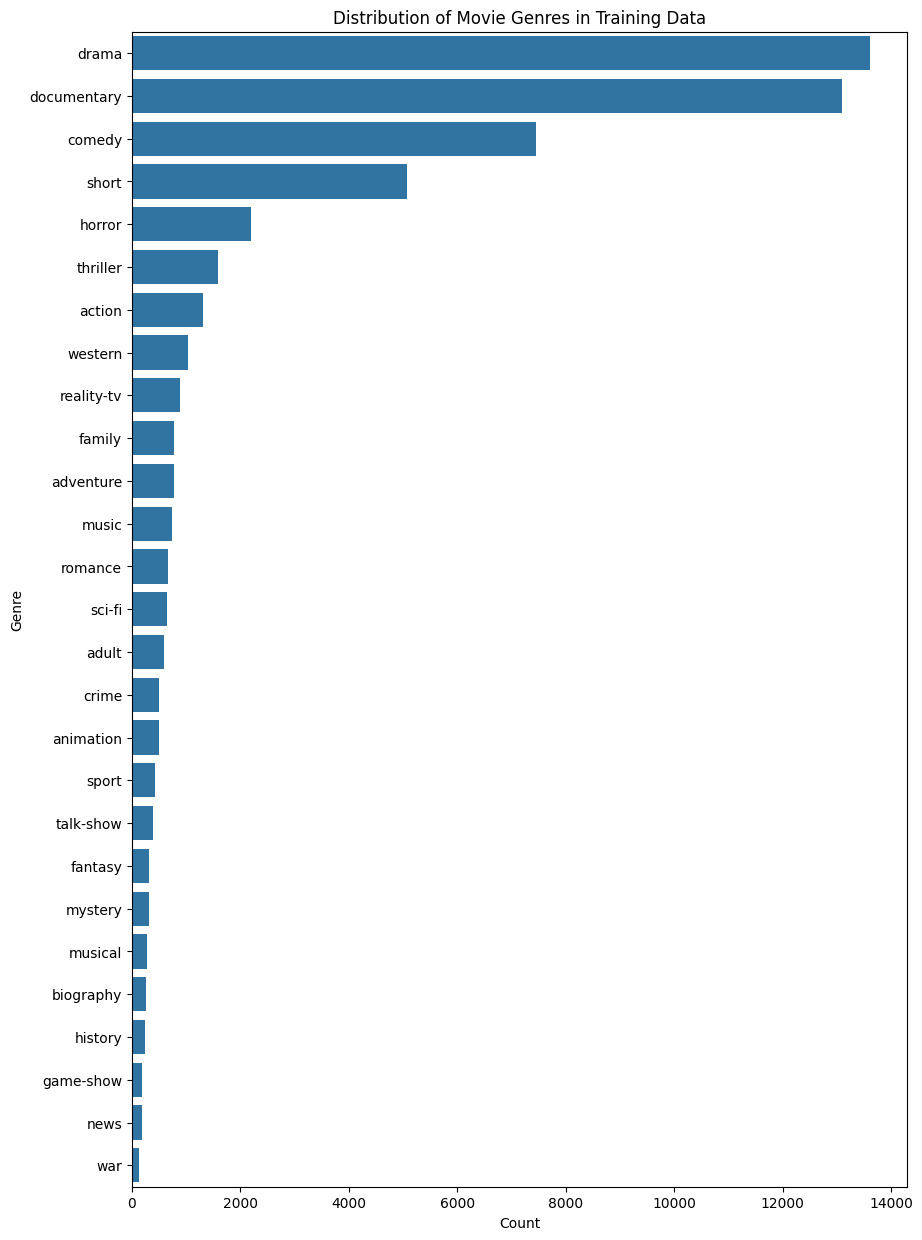

In [31]:
plt.figure(figsize=(10, 15))
sns.countplot(data= df_train, y="GENRE", order= df_train["GENRE"].value_counts().index)
plt.title("Distribution of Movie Genres in Training Data")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

In [13]:
print(df_train.shape)

print(df_test.shape)

(54214, 3)
(54200, 2)


In [14]:
tfidf = TfidfVectorizer(max_features=5000)


X_train = tfidf.fit_transform(df_train['DESCRIPTION'])
X_test = tfidf.transform(df_test['DESCRIPTION'])



In [17]:
import nltk


nltk.download('punkt')

nltk.download('stopwords')


stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)

    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()
    return text

df_train["TextCleaning"] = df_train["DESCRIPTION"].apply(data_processing)
df_test["TextCleaning"] = df_test["DESCRIPTION"].apply(data_processing)

In [19]:
vector = TfidfVectorizer()

x_train = vector.fit_transform(df_train["TextCleaning"])
x_test = vector.transform(df_test["TextCleaning"])

In [20]:
x = x_train
y = df_train["GENRE"]



In [21]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (43371, 116607)
Size of y_train:  (43371,)
Size of x_test:  (10843, 116607)
Size of y_test:  (10843,)


In [22]:
model1 = LogisticRegression()
model2 = SVC()
model3 = MultinomialNB()

In [23]:
columns=['LogisticRegression','SVC','MultinomialNB']
result=[]

In [24]:
def cal(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_pred,y_test)
    result.append(accuracy)

    print("-----Model Evaluation on Test Data-----")
    print(model)
    print(accuracy)


In [27]:
cal(model1)

-----Model Evaluation on Test Data-----
LogisticRegression()
0.5759476159734391


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
cal(model2)

-----Model Evaluation on Test Data-----
SVC()
0.5675551046758277


In [33]:
cal(model3)

-----Model Evaluation on Test Data-----
MultinomialNB()
0.4460942543576501
